In [1]:
import numpy as np
import matplotlib.pyplot as plt

Waveforms of interest: 

* Sinusoid (single frequency, varying phase shift)
* Sum of sinusoids with different frequencies and phases
* Product of sinusoids with different frequencies and phases
* Square wave (both single and periodic)
* Triangle wave (sawtooth, ramp, reverse ramp)
* Gaussian function
* finite-time sinusoid
* Gaussian wave packet

# 1. Gaussian Function

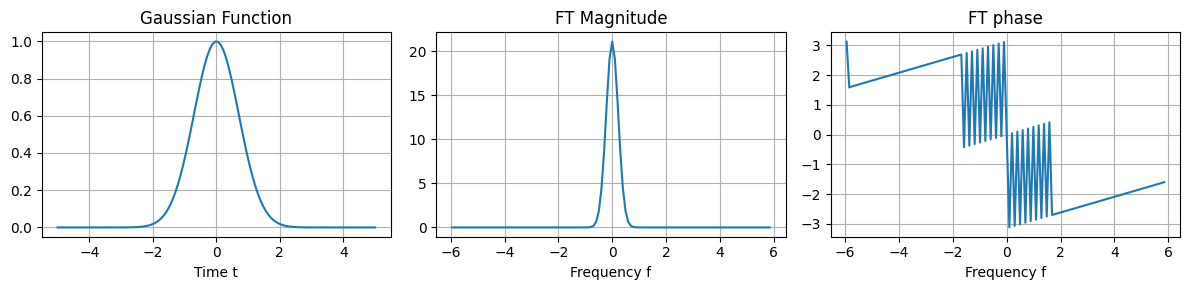

In [48]:
#FFT of a Gaussian Function
xmax = 5.0
fsamp = 12.0

# Create a sample signal (gaussian)
def gaussian(x, A = 1, b = 1, ):
    return A*np.exp(-b*x**2)

xk = np.linspace(-xmax, xmax, int(2.0*xmax*fsamp))


# Compute the Fast Fourier Transform
fft_result = np.fft.fft(gaussian(xk))
frequencies = np.fft.fftfreq(len(gaussian(xk)), d=xk[1] - xk[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(xk, gaussian(xk))
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Gaussian Function")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")


for ax in axs:
    ax.grid(True)
fig.tight_layout()

# 2. Sum of Sinusoids

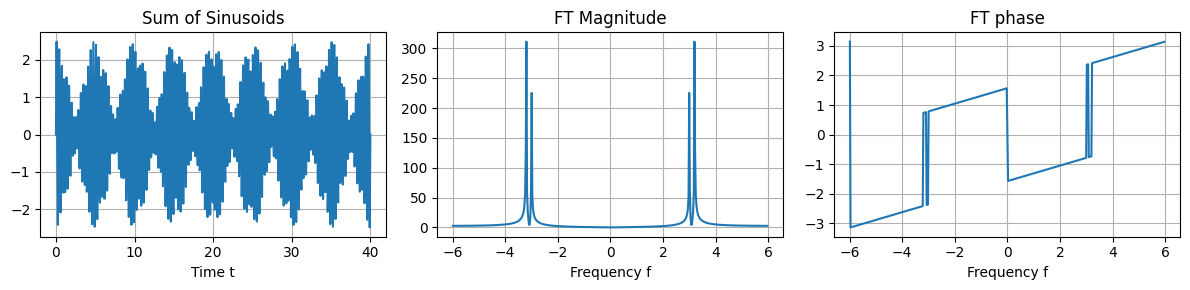

In [47]:
#FFT for a signal that is a sum of sinusoid with different frequencies
def G(t, A = 1, f=3):
    return A*np.sin(2*np.pi*f*t)

def sumofsinusoids(t, a0, a1, f0, f1):
    return G(t, A = a0, f=f0) + G(t, A = a1, f = f1)

tmax = 40 #s
fsamp = 12 #Hz

#time space
tk = np.linspace(0, tmax, int(tmax*fsamp))

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(sumofsinusoids(tk, a0 = 1, a1 = 1.5, f0 = 3.0, f1 = 3.2))
frequencies = np.fft.fftfreq(len(sumofsinusoids(tk, a0 =1, a1 = 1.5, f0 = 3.0, f1 = 3.2)), d=tk[1] - tk[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(tk, sumofsinusoids(tk, a0 = 1, a1 = 1.5, f0 = 3.0, f1 = 3.2))
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Sum of Sinusoids")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")


for ax in axs:
    ax.grid(True)
fig.tight_layout()

# 3. Sinusoid (single frequency, varying phase shift)

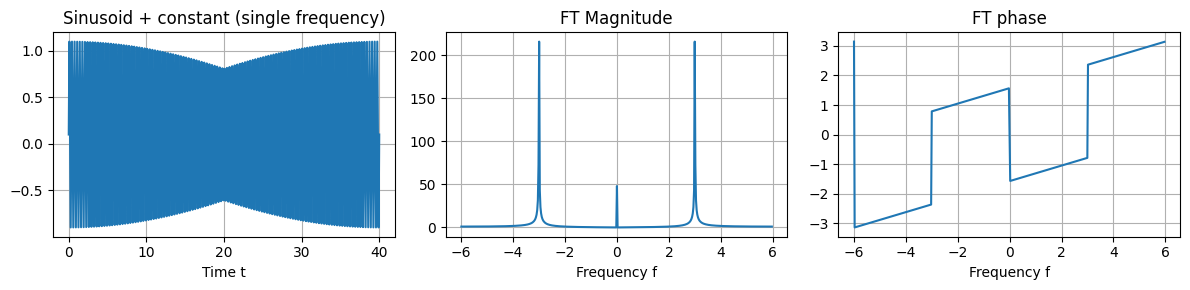

In [53]:
def sum_sinu_cons(t, A, C, f): 
    return C + A*np.sin(2*np.pi*f*t)

tmax = 40 #s
fsamp = 12 #Hz

#time space
tk = np.linspace(0, tmax, int(tmax*fsamp))

func = sum_sinu_cons(tk, 1, 0.1, 3)

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(func)
frequencies = np.fft.fftfreq(len(func), d=tk[1] - tk[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(tk, func)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Sinusoid + constant (single frequency)")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")


for ax in axs:
    ax.grid(True)
fig.tight_layout()

# 4. Product of Sinusoids

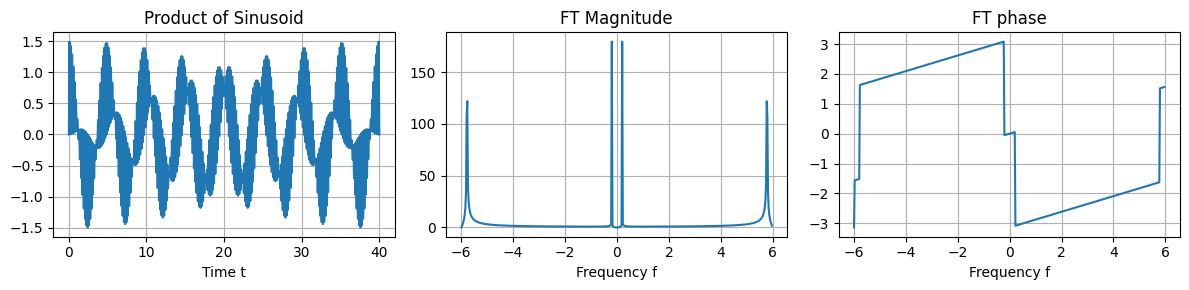

In [45]:
def G(t, A = 1, f=3):
    return A*np.sin(2*np.pi*f*t)
#We already defined a function G a while back that returns a sinusoid, let's just use it again for the product
def prod_sinusoid(t, a0, a1, f0, f1):
    return G(t, A = a0, f=f0)*G(t, A = a1, f = f1)

#lets just use the same tk, fsamp, and tmax from earlier
f_prod_sinu = prod_sinusoid(tk, 1, 1.5, 3, 3.2)

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(f_prod_sinu)
frequencies = np.fft.fftfreq(len(f_prod_sinu), d=tk[1] - tk[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(tk, f_prod_sinu)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Product of Sinusoid")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")


for ax in axs:
    ax.grid(True)
fig.tight_layout()

# 5. Square Wave (Single and Periodic)

In [9]:
from scipy import signal

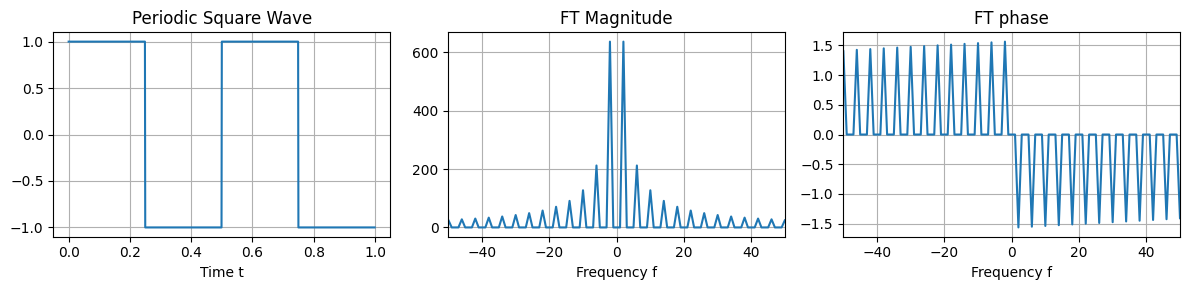

In [44]:
# Define parameters for the square wave
frequency = 2  # Hz
amplitude = 1
duration = 1   # seconds
sampling_rate = 1000 # samples per second

# Generate a time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the square wave using scipy signal
square_wave = amplitude*signal.square(2*np.pi*frequency*t, duty=0.5)

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(square_wave)
frequencies = np.fft.fftfreq(len(square_wave), d=t[1] - t[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(t, square_wave)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Periodic Square Wave")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")
axs[1].set_xlim(-50, 50)

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")
axs[2].set_xlim(-50, 50)


for ax in axs:
    ax.grid(True)
fig.tight_layout()

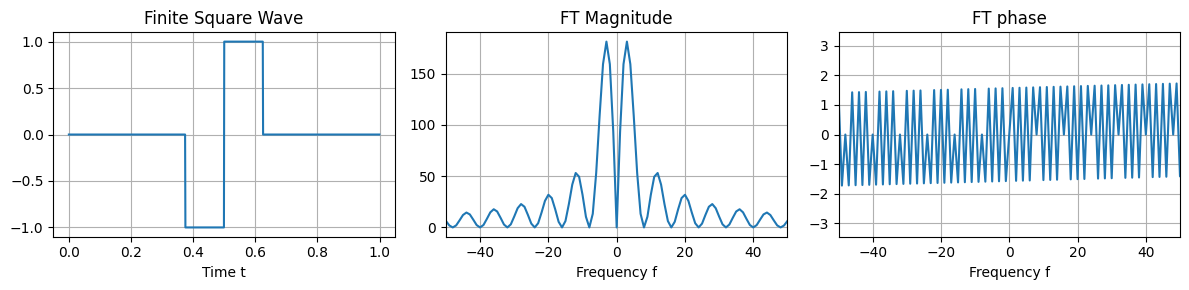

In [43]:
# Create a finite rectangular window (start in the middle for example)

pulse_width = 0.25     # pulse duration inside the 1 second window
window = np.zeros_like(t)
start = int(0.5 * sampling_rate - pulse_width * sampling_rate / 2)
end   = int(0.5 * sampling_rate + pulse_width * sampling_rate / 2)
window[start:end] = 1

# Apply the window → finite square wave
square_wave_finite = square_wave* window
# Compute the Fast Fourier Transform
fft_result = np.fft.fft(square_wave_finite)
frequencies = np.fft.fftfreq(len(square_wave_finite), d=t[1] - t[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(t, square_wave_finite)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Finite Square Wave")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")
axs[1].set_xlim(-50, 50)

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")
axs[2].set_xlim(-50, 50)


for ax in axs:
    ax.grid(True)
fig.tight_layout()

# 6. Triangle Wave (Sawtooth, Ramp, Reverse Ramp)

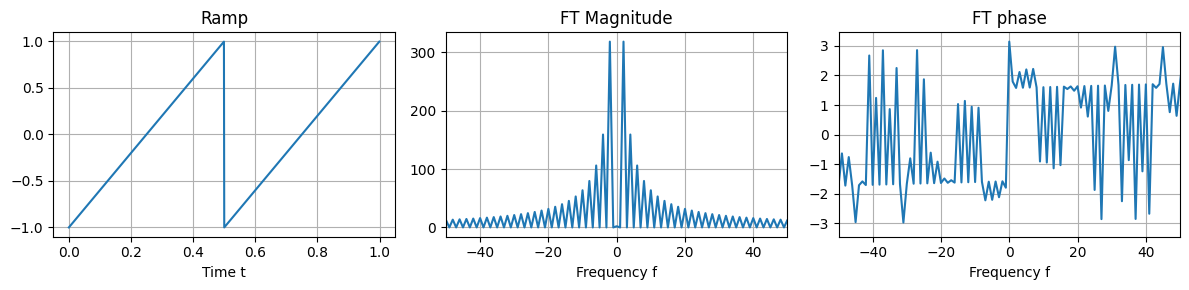

In [39]:
#let's just use the same parameters from the square wave
triangle_ramp = signal.sawtooth(2*np.pi*frequency*t)

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(triangle_ramp)
frequencies = np.fft.fftfreq(len(triangle_ramp), d=t[1] - t[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(t, triangle_ramp)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Ramp")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")
axs[1].set_xlim(-50, 50)

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")
axs[2].set_xlim(-50, 50)


for ax in axs:
    ax.grid(True)
fig.tight_layout()

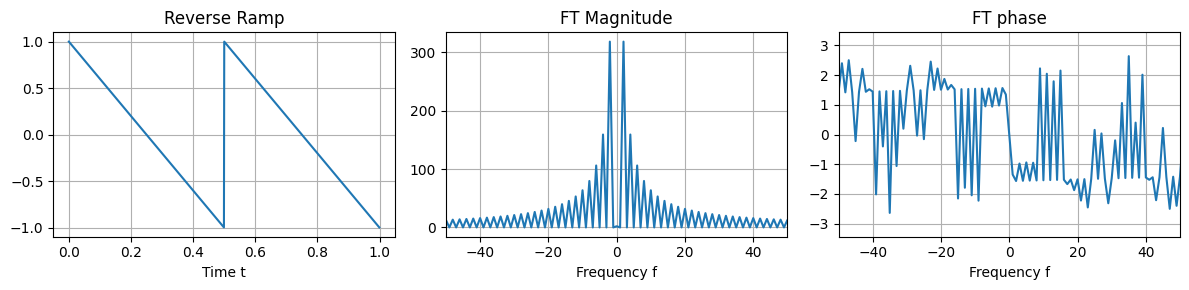

In [38]:
#let's just use the same parameters from the square wave
# width=0 produces a reverse ramp
rev_ramp = signal.sawtooth(2*np.pi*frequency*t, width=0)

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(rev_ramp)
frequencies = np.fft.fftfreq(len(rev_ramp), d=t[1] - t[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(t, rev_ramp)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Reverse Ramp")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")
axs[1].set_xlim(-50, 50)

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")
axs[2].set_xlim(-50, 50)

for ax in axs:
    ax.grid(True)
fig.tight_layout()

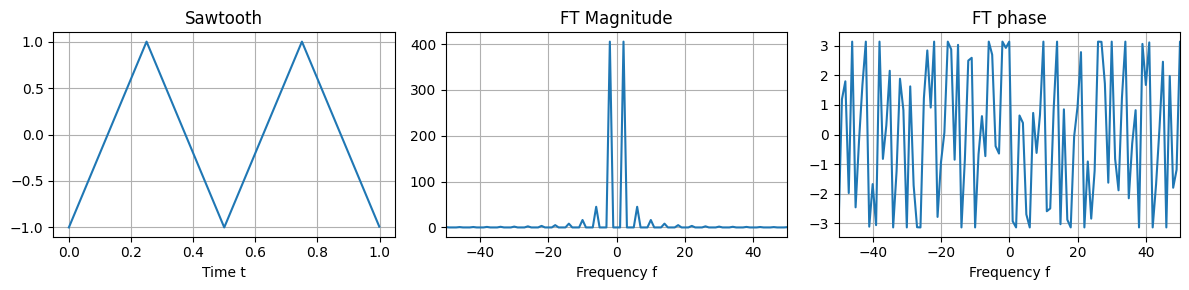

In [37]:
#let's just use the same parameters from the square wave
# width=0.5 produces a sawtooth wave
sawtooth = signal.sawtooth(2*np.pi*frequency*t, width=0.5)

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(sawtooth)
frequencies = np.fft.fftfreq(len(sawtooth), d=t[1] - t[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(t, sawtooth)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Sawtooth")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")
axs[1].set_xlim(-50, 50)

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")
axs[2].set_xlim(-50, 50)


for ax in axs:
    ax.grid(True)
fig.tight_layout()

# 7. Finite Time Sinusoid

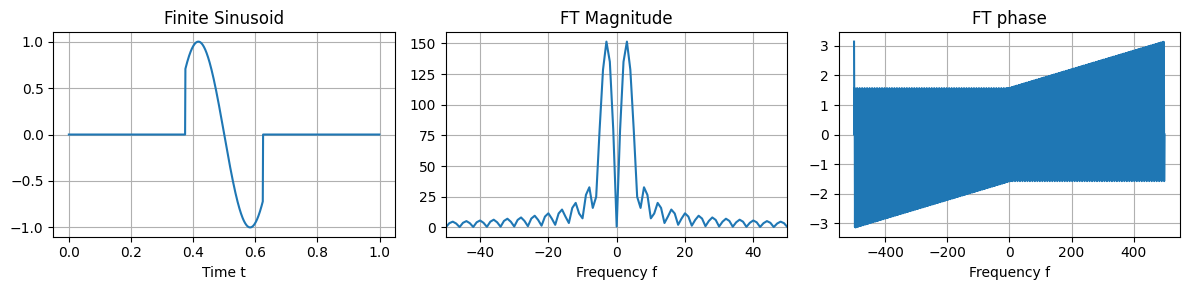

In [34]:
# Create a finite rectangular window (start in the middle for example)

pulse_width = 0.25     # pulse duration inside the 1 second window
window = np.zeros_like(t)
start = int(0.5 * sampling_rate - pulse_width * sampling_rate / 2)
end   = int(0.5 * sampling_rate + pulse_width * sampling_rate / 2)
window[start:end] = 1

#sinusoid, let's just use the G function from earlier
finite_sinusoid = G(t, A = 1, f=3)*window

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(finite_sinusoid)
frequencies = np.fft.fftfreq(len(finite_sinusoid), d=t[1] - t[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

#Compute the phase
phase = np.angle(fft_shifted)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

ax_t.plot(t, finite_sinusoid)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Finite Sinusoid")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")
axs[1].set_xlim(-50, 50)

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")


for ax in axs:
    ax.grid(True)
fig.tight_layout()

# 8. Gaussian Wave Packet

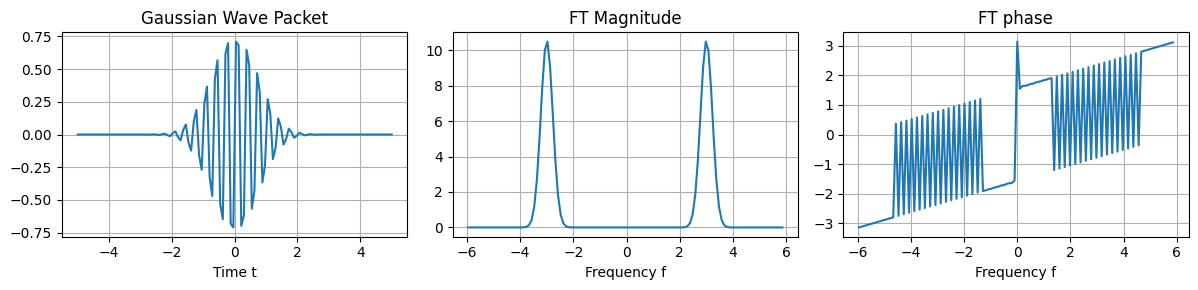

In [ ]:
#this is a gaussian multiplied to a sinusoid, let's just use the previous functions defined
gauss_wave_pack =  gaussian(xk)*G(xk)

# Compute the Fast Fourier Transform
fft_result = np.fft.fft(gauss_wave_pack)
frequencies = np.fft.fftfreq(len(gauss_wave_pack), d=xk[1] - xk[0])

# Shift the zero-frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)
frequencies_shifted = np.fft.fftshift(frequencies)

# Plot the magnitude spectrum
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
ax_t, ax_f, ax_p = axs

#Compute the phase
phase = np.angle(fft_shifted)

ax_t.plot(xk, gauss_wave_pack)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted))
ax_p.plot(frequencies_shifted, phase)

axs[0].set_title("Gaussian Wave Packet")
axs[0].set_xlabel("Time t")

axs[1].set_title("FT Magnitude")
axs[1].set_xlabel("Frequency f")

axs[2].set_title("FT phase")
axs[2].set_xlabel("Frequency f")


for ax in axs:
    ax.grid(True)
fig.tight_layout()